## MS Example 2: Multiplicative Noise

In [1]:
import numpy as np
import dfo_v1 as dfo
import ECNoise as ECN
import active_subspaces as ac
import matplotlib.pyplot as plt

We choose $\mathbf{x}^{(0)}=(u,u,\ldots,u)$, $u \sim U[-1,1]$.

We let $f: \mathbf{\lambda}: \mathbb{R}^{11} \to \mathbb{R}$, where $$f(\lambda; \xi)=\left(\sum_{i=0}^{10} 2^{(-1)^i i}\lambda_i^2\right)(1+\epsilon(\xi)), \quad \epsilon(\xi) \sim U[-k,k], \quad k=1 \times 10^{-2}.$$

In [2]:
dim=11
xinit=2*np.random.rand(dim,1)-1 # double of what's above appears here
print(np.shape(xinit))


print(np.transpose(xinit))

(11, 1)
[[ 0.89905708  0.66155157 -0.80627924 -0.50370148 -0.63297952 -0.48887748
   0.84159235 -0.05722136  0.38542095 -0.62293304 -0.60653452]]


In [3]:
k=1E-2

weights=np.zeros((1,dim)) # row vec to make IP easy
for i in range(dim):
    weights[:,i]=2**(((-1)**i)*i)

def tfun(x,var=k):
    y=np.copy(x)
    y=y**2

    
    return np.dot(weights,y)*(1 + k*(2*np.random.rand()-1))
# Print check
print(np.transpose(xinit), tfun(xinit))

[[ 0.89905708  0.66155157 -0.80627924 -0.50370148 -0.63297952 -0.48887748
   0.84159235 -0.05722136  0.38542095 -0.62293304 -0.60653452]] [[473.41797046]]


In [4]:
M=10 # number of ECNoise f evals

noise_array=ECN.ECNoise(tfun,xinit,M,mult=True)
mynoise=noise_array[0][0]
gen_f_vals=noise_array[2]
print(gen_f_vals, mynoise)

(11, 1) (11, 1)
[472.14379516 465.28240149 470.9032213  463.14661353 463.83473119
 468.73073769 466.15278654 467.7035842  461.35086165 465.97895811] 3.655360019606552e-05


In [5]:
print('estimated noise var is', mynoise, 'true var is', k**2/6, 'with relative error', abs(mynoise-k)/k)

estimated noise var is 3.655360019606552e-05 true var is 1.6666666666666667e-05 with relative error 0.9963446399803936


In [6]:
h=0.01
fm=gen_f_vals[1]
f0=gen_f_vals[2]
fp=gen_f_vals[3]
L_1_hat=abs(fp-2*f0+fm)*(1/h)**2

d1=abs(fp-f0)*(1/h)
d2=abs(fm-f0)*(1/h)
L_1_hat_1=abs(d1-d2)*(1/h)


print('estimated upper bound on ||f''|| is', L_1_hat, 'estimated value of L_1 from FD is', L_1_hat_1)

estimated upper bound on ||f|| is 133774.2756950655 estimated value of L_1 from FD is 21357.879601818582


In [7]:
L_1_hat=2663.78
mynoise=1.92e-5

mu_star_OG=dfo.get_mult_mu_star(mynoise,L_1_hat,dim)
h_OG=dfo.get_h(L_1_hat,dim)

In [8]:
x=np.copy(xinit)
maxit=50
xhist=np.array(x)
fhist=np.array(tfun(x))
yhist=xhist
ghist=fhist
L1Bhist=np.array(L_1_hat)
for i in range(maxit):
    [x,f,y,fy,p,q,L1B]=dfo.STARS(x,tfun,mu_star_OG,h_OG,mult=True)
    xhist=np.hstack((xhist,x))
    fhist=np.vstack((fhist,f))
    yhist=np.hstack((yhist,y))
    ghist=np.vstack((ghist,fy))
    L1Bhist=np.vstack((L1Bhist,L1B))

In [9]:
print('our algorithm terminates with x value',np.transpose(x), 'which has f value',f)

our algorithm terminates with x value [[ 0.89272122  0.65966522 -0.758192   -0.45462485 -0.642633   -0.56121103
   0.89580981 -0.07274205  0.3650894  -0.56448988 -0.32951096]] which has f value [[208.46930725]]


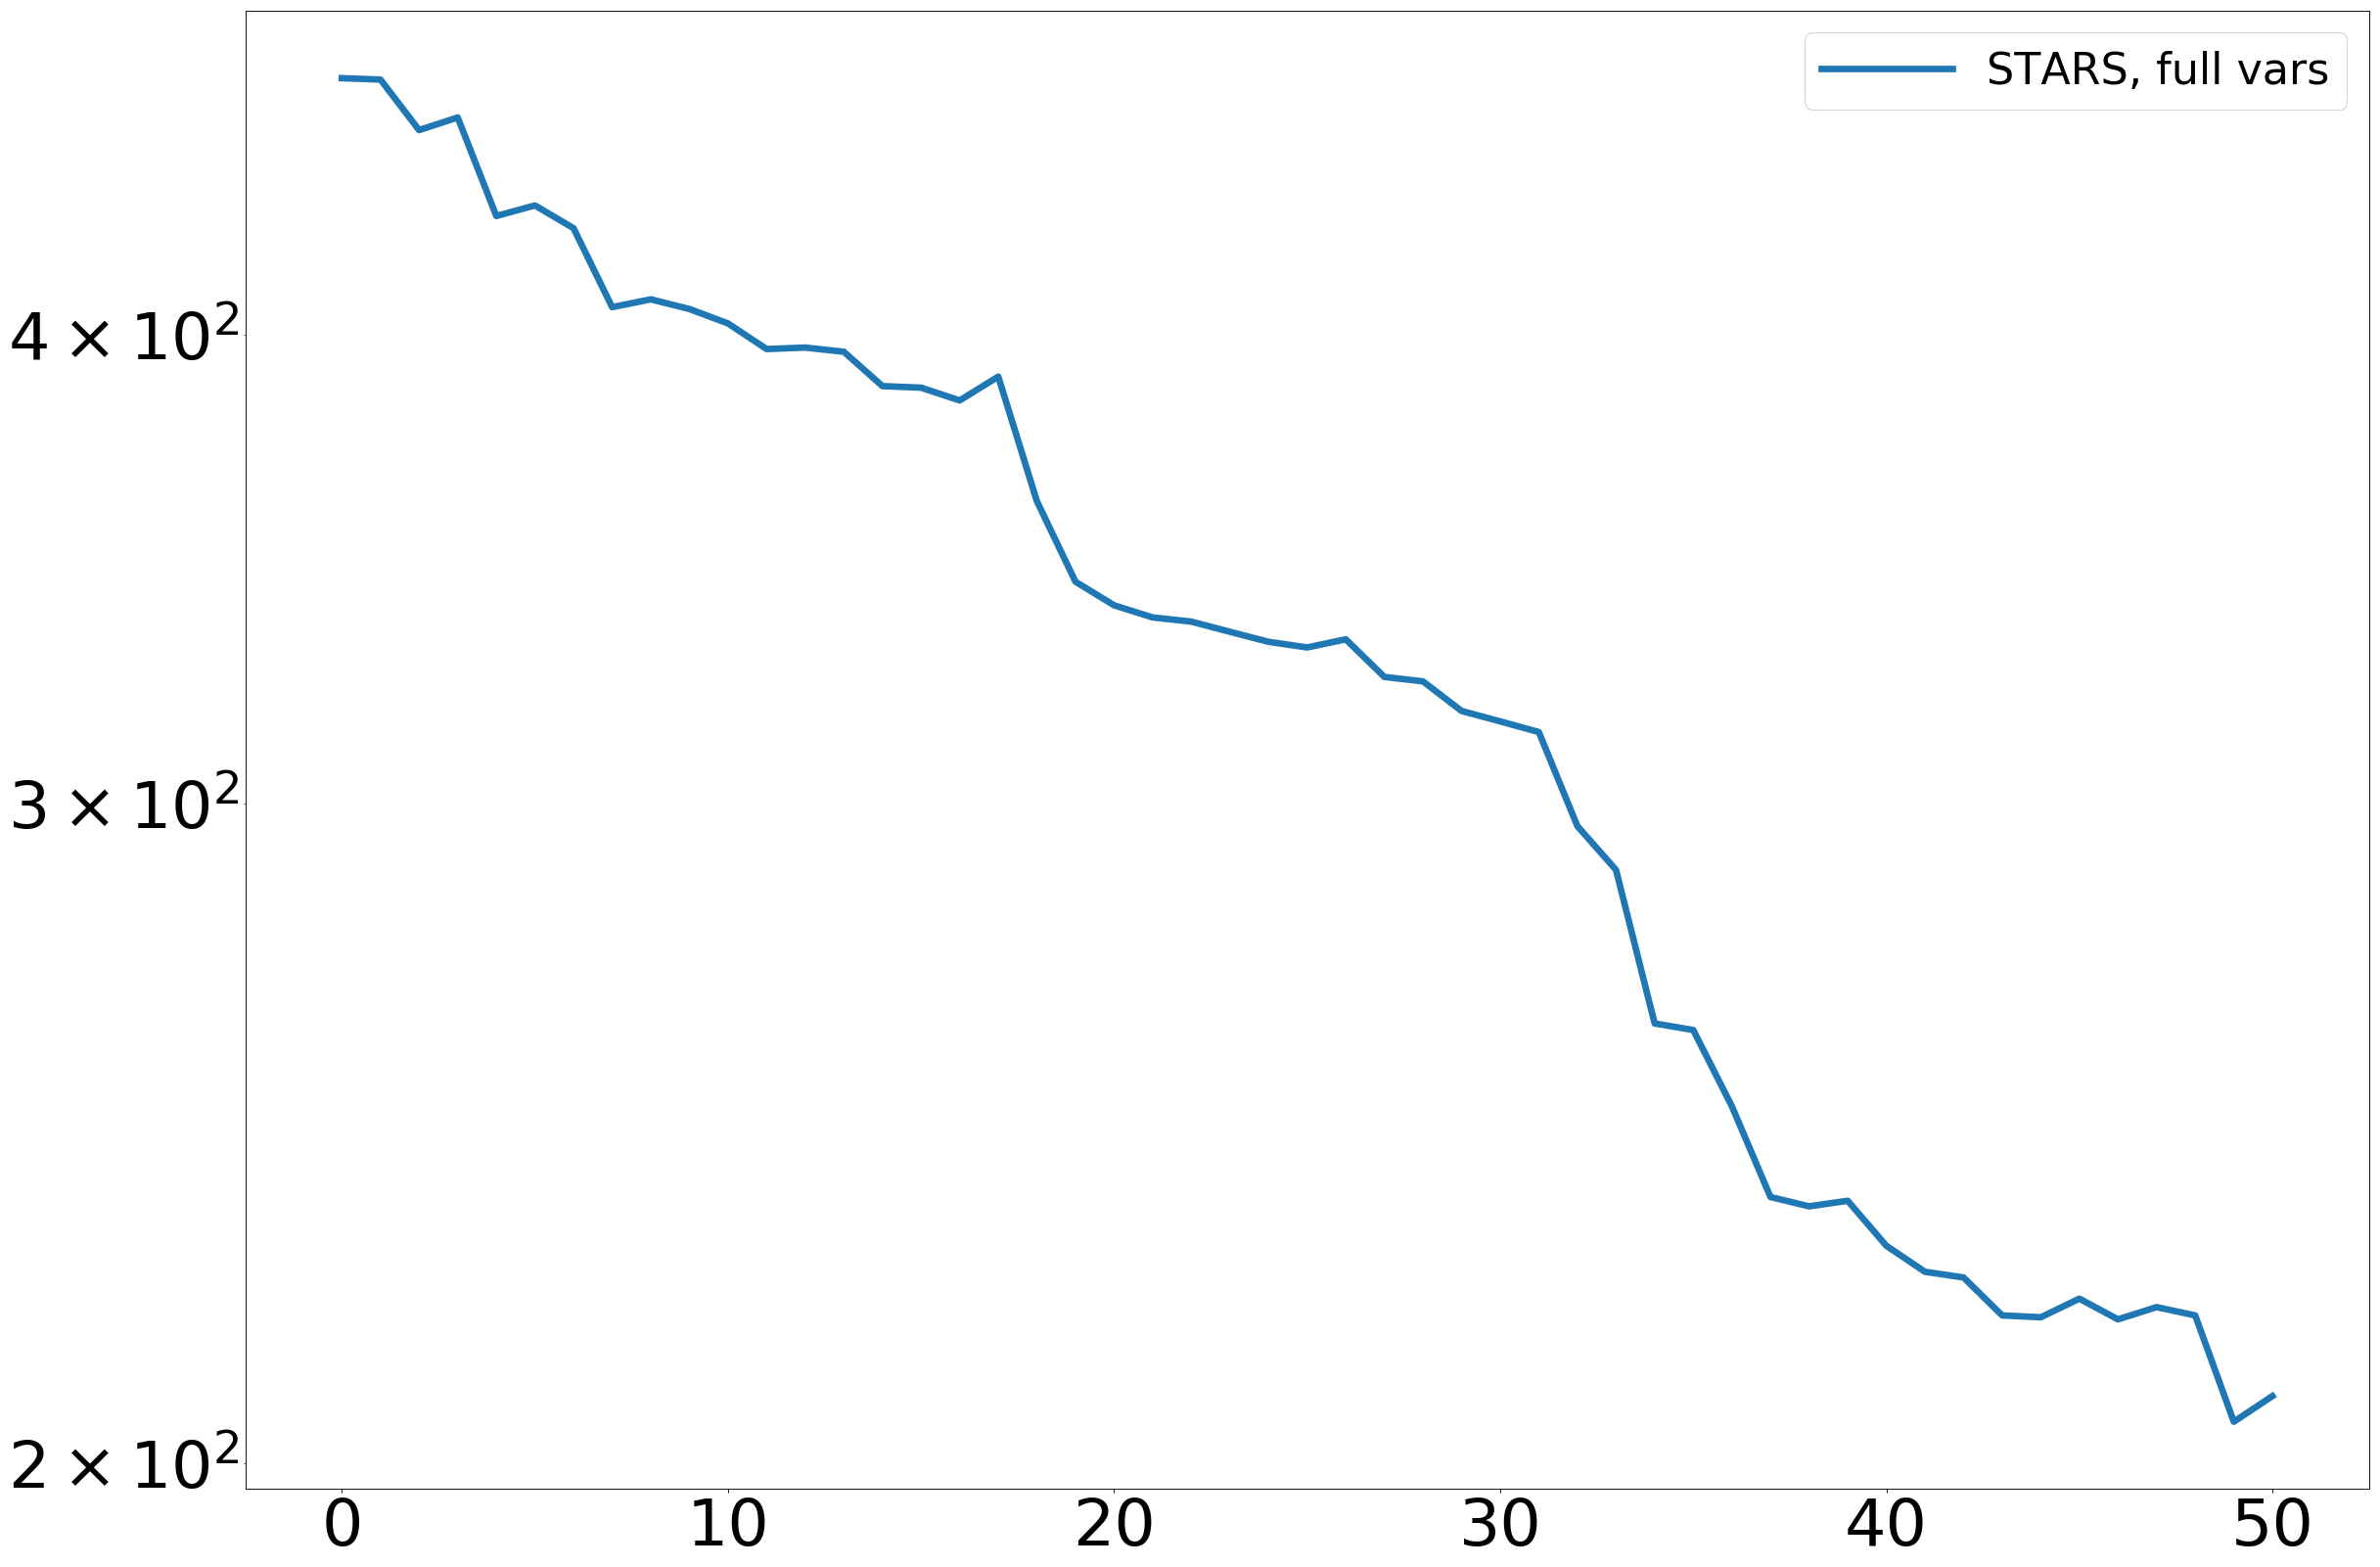

In [10]:
params = {'legend.fontsize': 40,
          'legend.handlelength': 3}
plt.rcParams["figure.figsize"] = (35,25)
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['font.size'] = 60
plt.rcParams['figure.titlesize'] = 'xx-large'
plt.rcParams.update(params)

plt.semilogy(fhist,lw=6,label='STARS, full vars')
plt.legend()
plt.show()

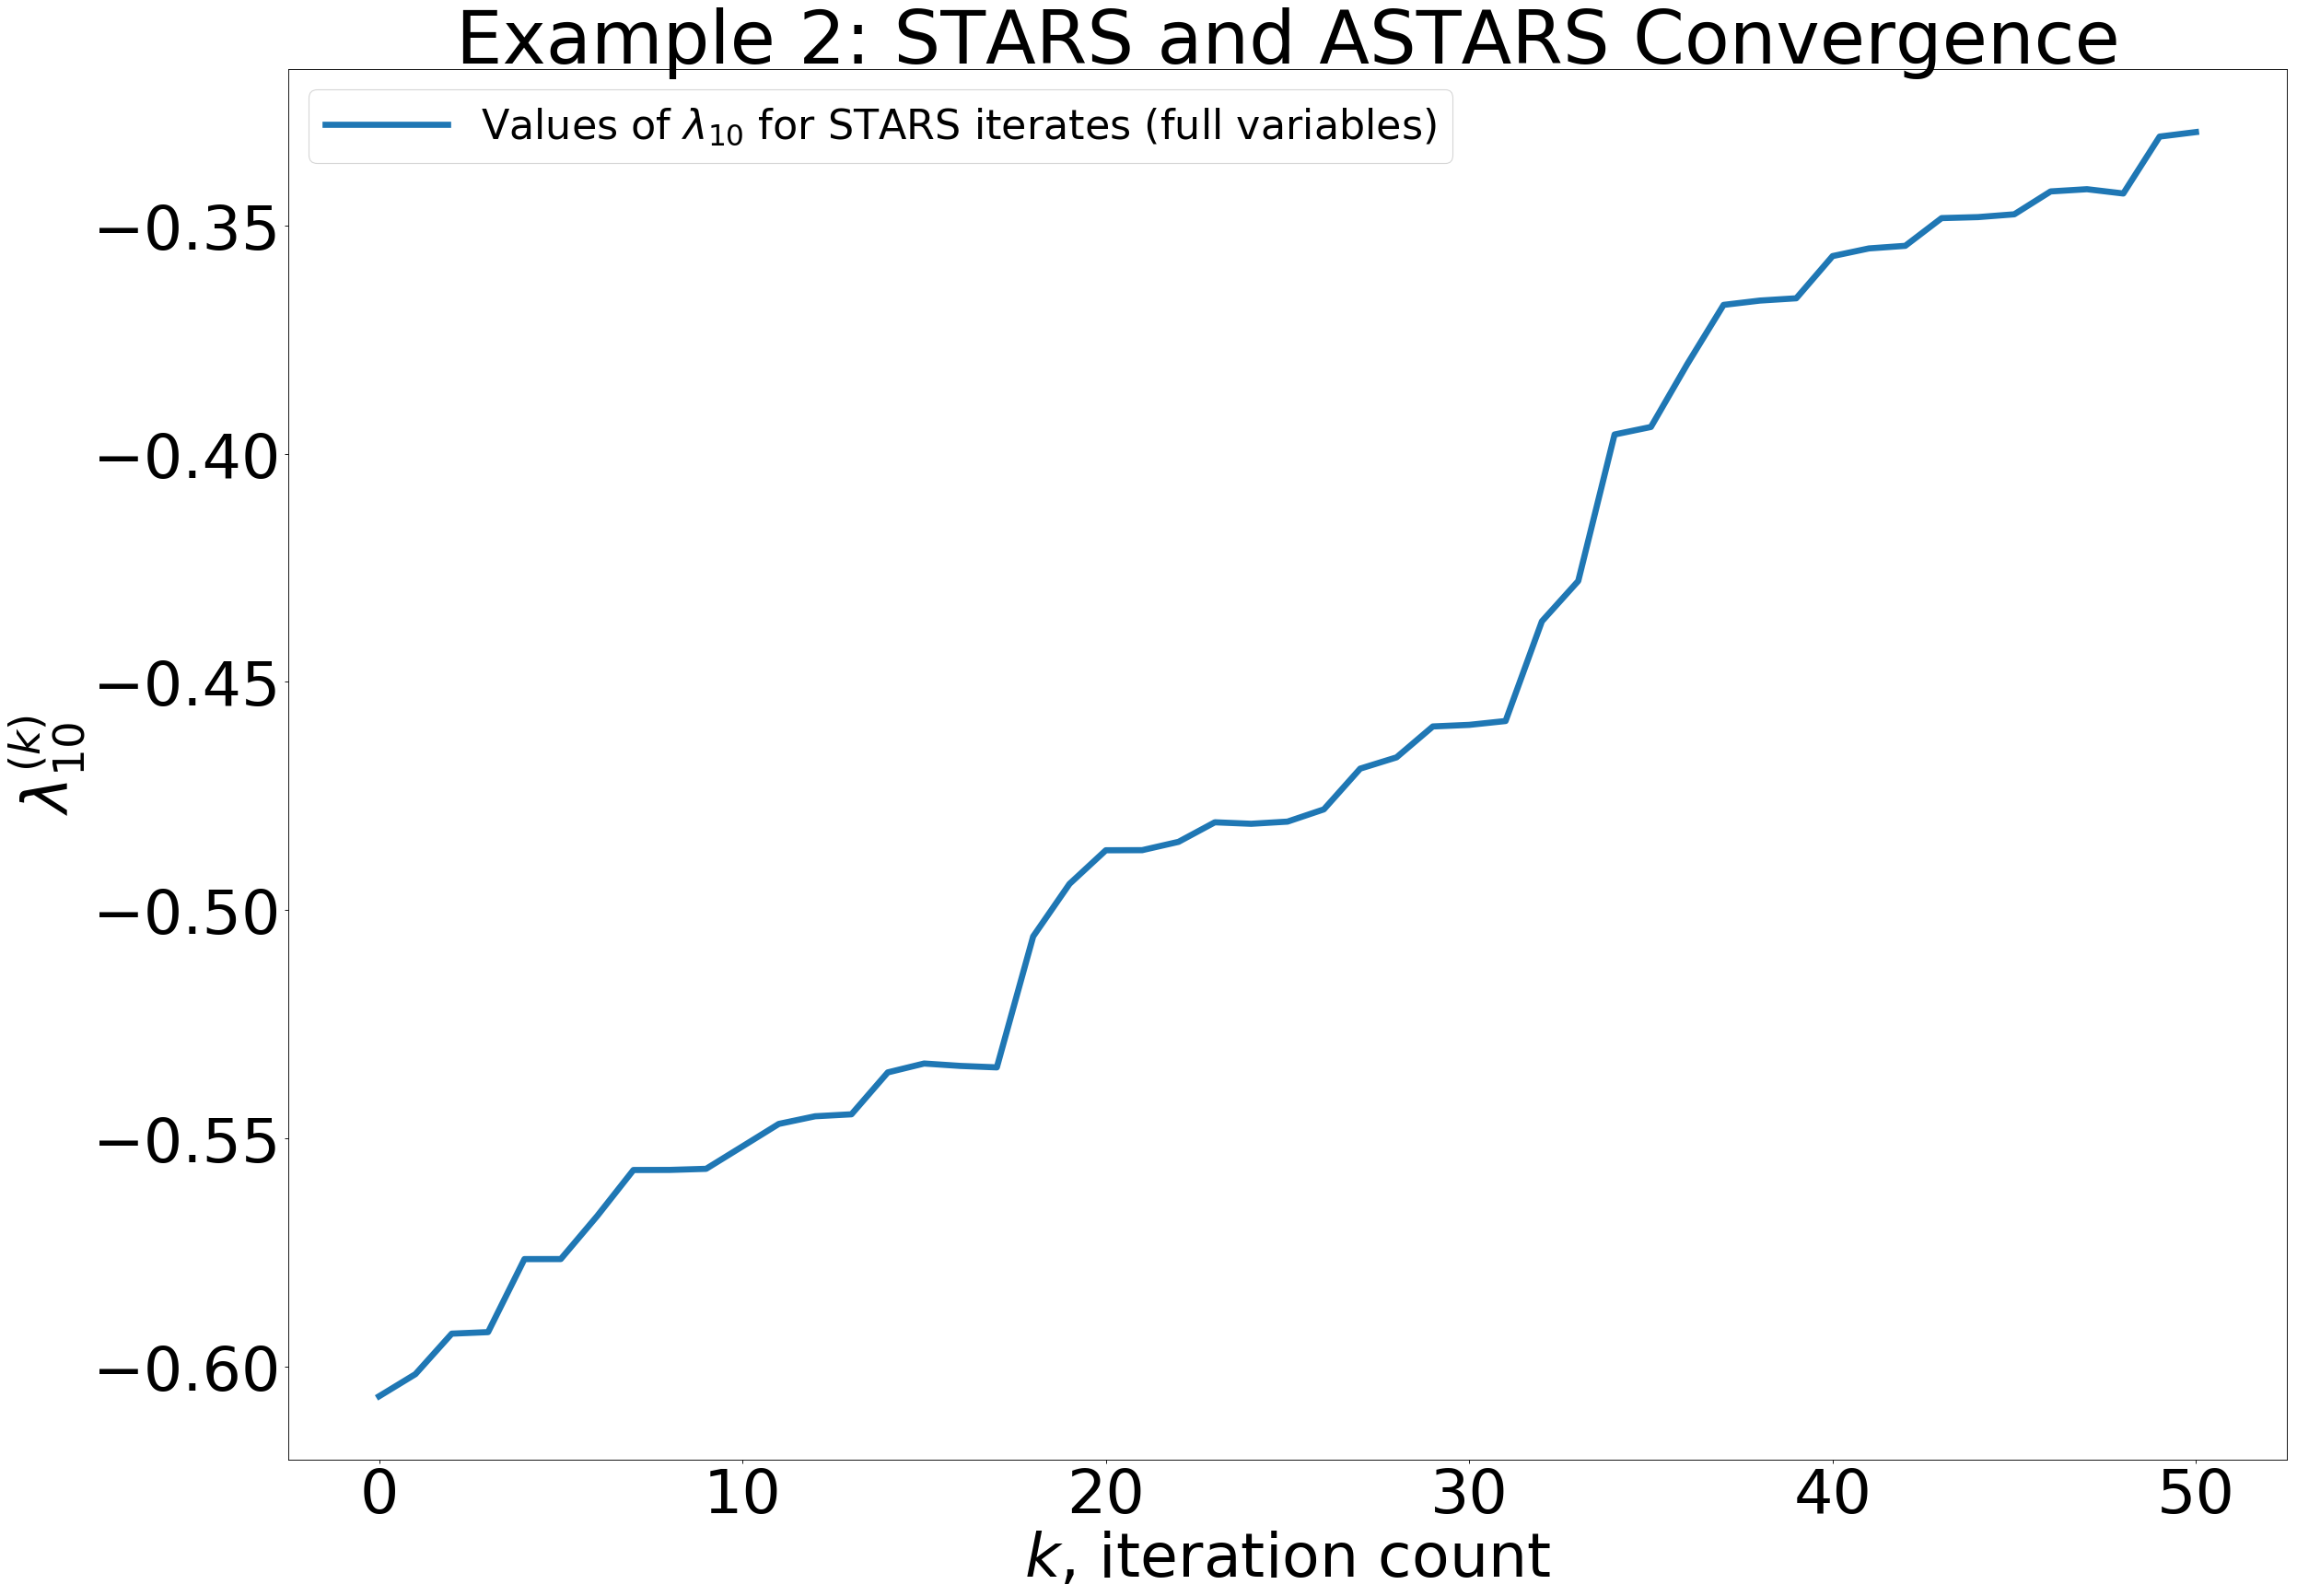

In [11]:
plt.plot(xhist[10],lw=6,label='Values of $\lambda_{10}$ for STARS iterates (full variables)')
plt.xlabel('$k$, iteration count')
plt.ylabel('$\lambda^{(k)}_{10}$')
plt.title('Example 2: STARS and ASTARS Convergence')
plt.legend()

n should be an integer. Performing conversion.
[[47220.28241986]
 [16073.49102078]
 [ 1831.31280663]
 [  886.39010977]
 [  657.28213558]
 [  550.08680501]
 [  364.36465891]
 [  263.75798171]
 [  128.3675408 ]
 [   85.53282401]
 [   74.57606234]]
[[ 2.04933798e-01  7.73106947e-02  4.07058771e-01  4.22248364e-01
   1.48789504e-02  1.71847360e-01]
 [-5.05861379e-02  4.43224881e-02  3.26006359e-01 -1.15016479e-01
   1.03747238e-01 -5.75778152e-01]
 [ 2.86281169e-01  3.06868502e-01  3.28130848e-02 -7.74404856e-02
   9.43652772e-02 -5.55941718e-01]
 [-2.95097009e-02  1.10205274e-01 -1.90283095e-01 -6.45412624e-01
  -2.99332207e-01 -4.88583088e-02]
 [ 3.05735565e-01 -2.23000573e-02  2.88154734e-02  3.32587467e-02
  -5.36091165e-01  1.38209846e-01]
 [-5.35337319e-01 -2.82272315e-01 -3.86774598e-02 -1.88872711e-01
  -4.62844747e-02  1.42604533e-01]
 [-4.27226826e-01 -3.92057956e-01  2.93222496e-01  1.07264713e-01
  -3.45310319e-02 -3.52434573e-01]
 [-1.25399425e-01  1.35769380e-01 -1.01197281e-

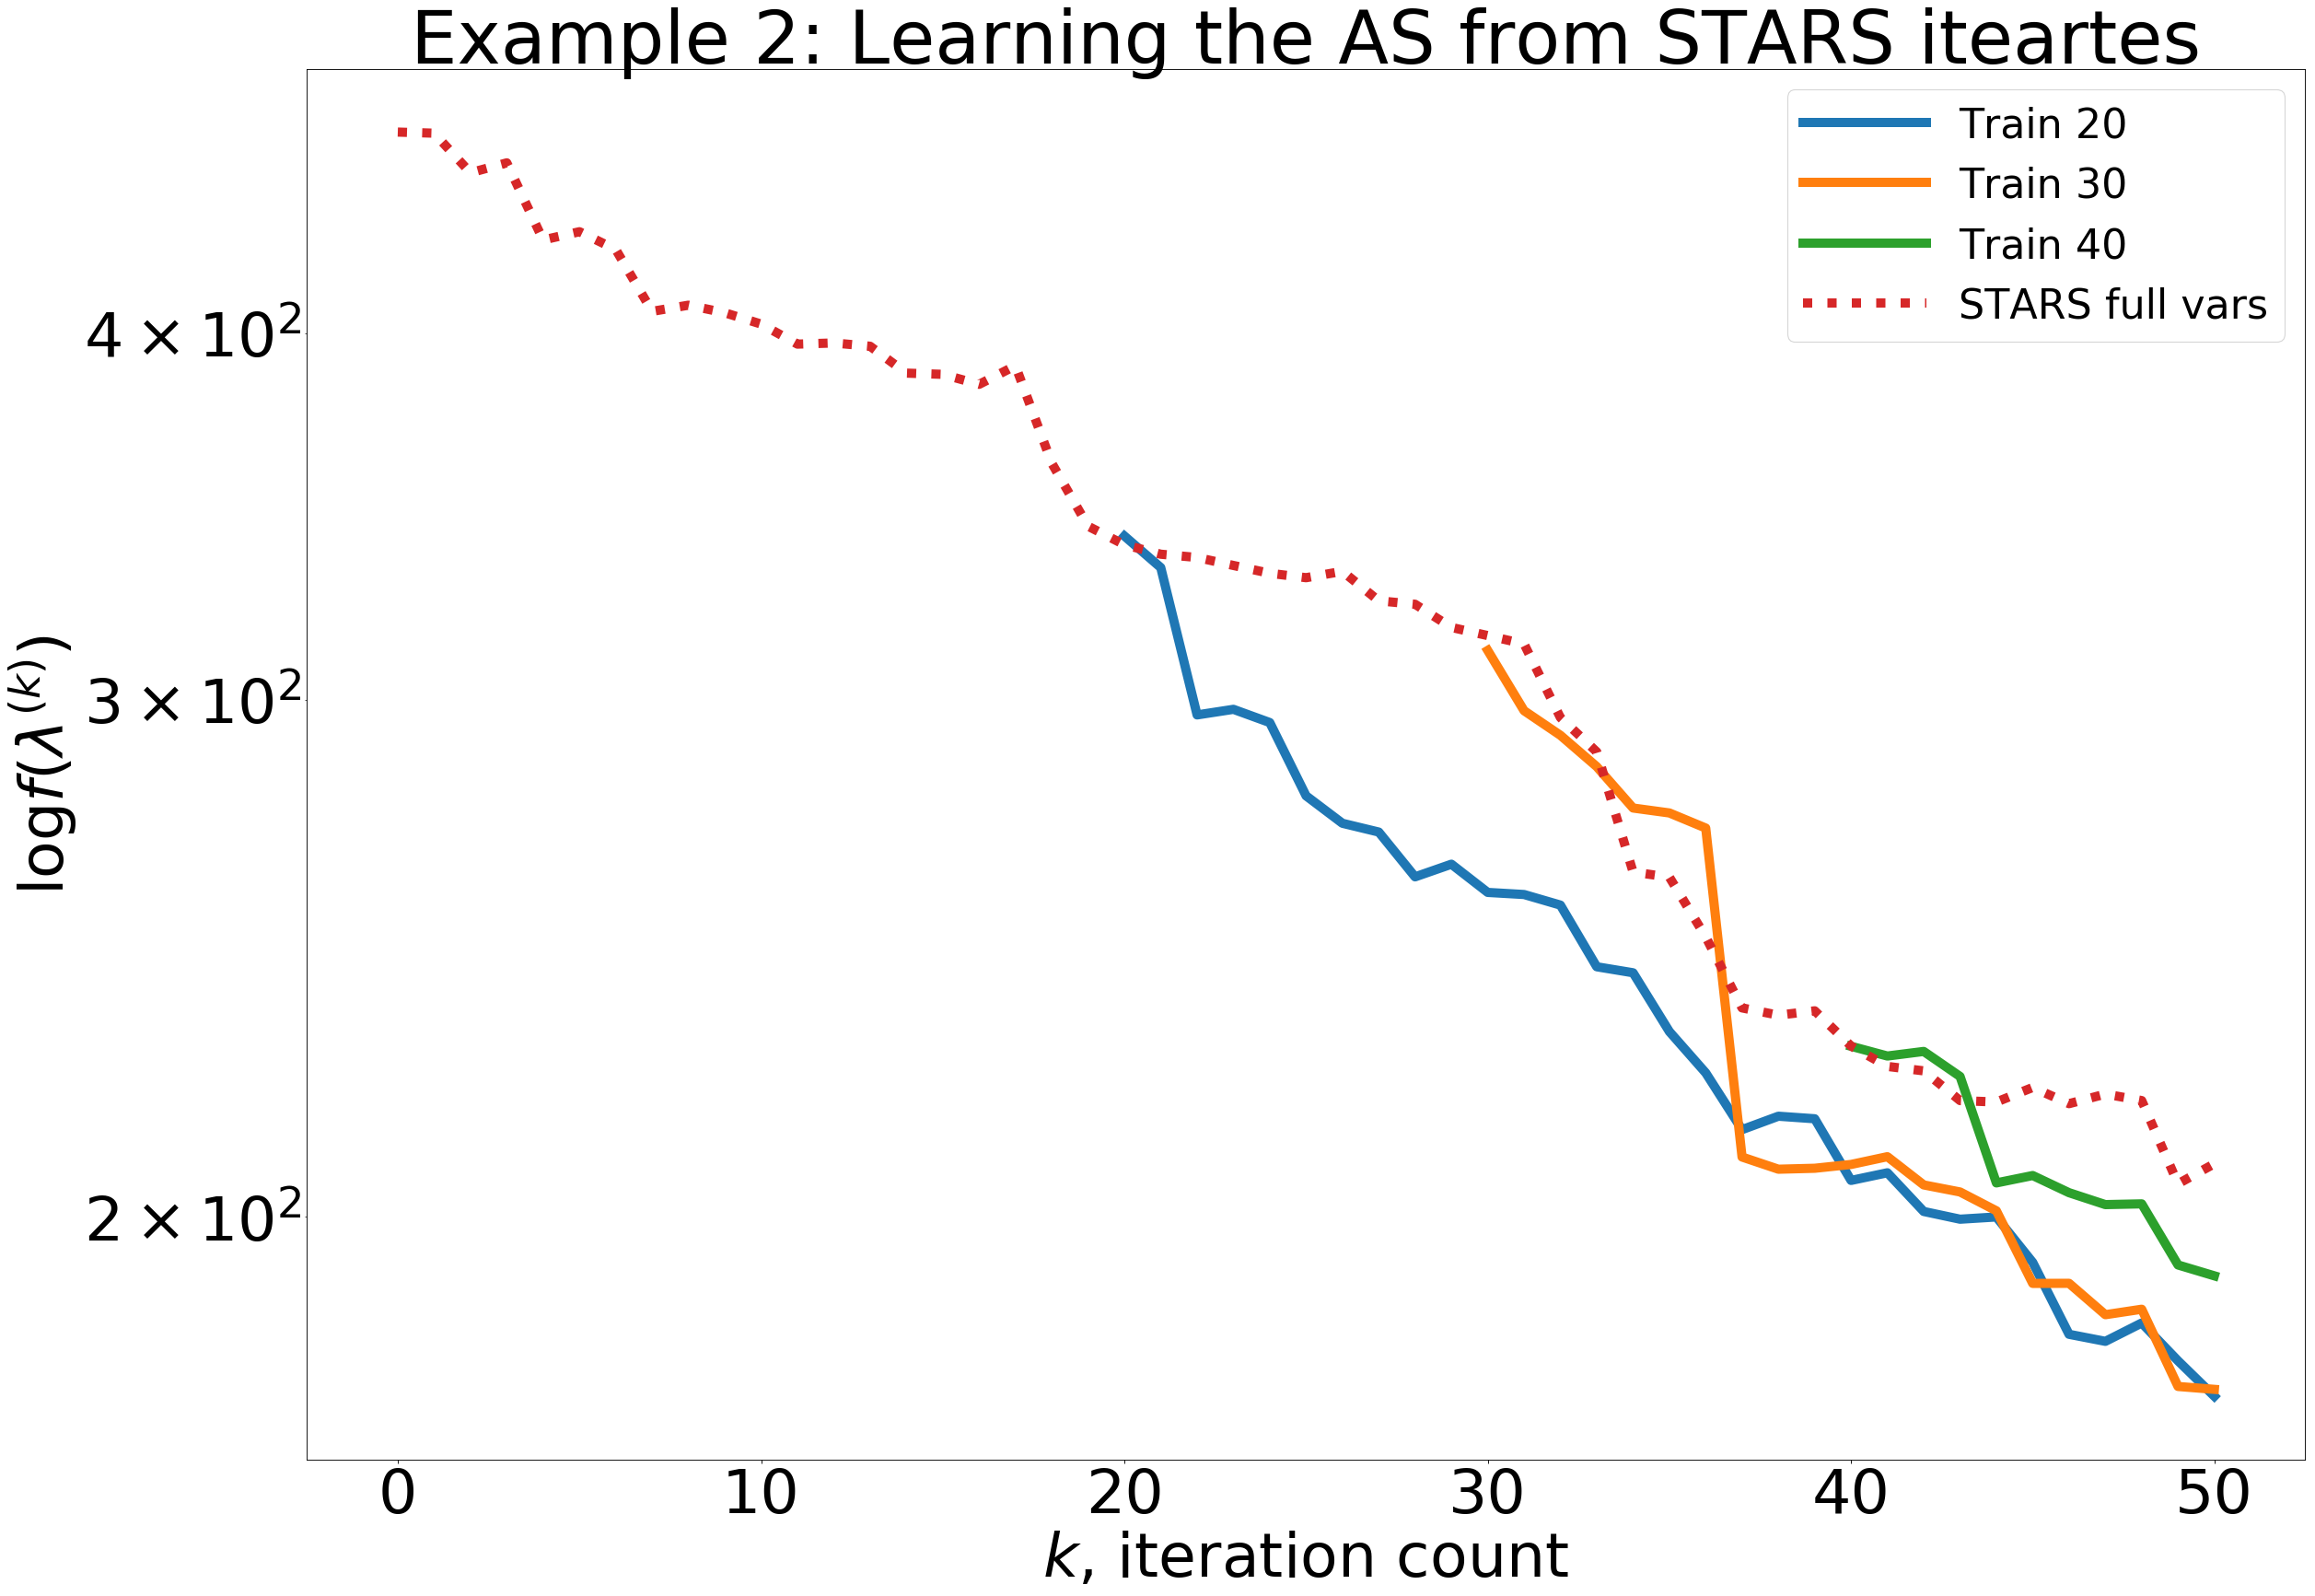

In [12]:
ss = ac.subspaces.Subspaces()
mu_star=dfo.get_mult_mu_star(mynoise,L_1_hat,6)
h=dfo.get_h(L_1_hat,6)

for tr_stop in range(20,50,10):

    trainx=np.hstack((xhist[:,0:tr_stop],yhist[:,0:tr_stop]))
    trainf=np.vstack((fhist[0:tr_stop],ghist[0:tr_stop]))
    trainx=np.transpose(trainx)


    # Use Local Linears
    df = ac.gradients.local_linear_gradients(trainx, trainf) #Estimated gradients using local linear models
    ss.compute(df=df, nboot=0)
    
    # Use Global Quadratic
    #ss.compute(X=trainx, f=trainf, nboot=0, sstype='QPHD')

    #sub=ss.eigenvecs
    sub=ss.eigenvecs[:,0:6]
    our_wts=np.sqrt(ss.eigenvals)
    print(our_wts)
    print(sub)
 
    x4=np.transpose([xhist[:,tr_stop]])
    xhist4=np.array(x4)
    fhist4=np.array(tfun(x4))


    for i in range(0,50-tr_stop):
        [x4,f,temp,temp2,p,q,L1B]=dfo.STARS(x4,tfun,mu_star,h,active=sub, wts=None,mult=True)
        xhist4=np.hstack((xhist4,x4))
        fhist4=np.vstack((fhist4,f))
    plt.semilogy(range(tr_stop,51),fhist4,label='Train '+str(tr_stop),lw=9)


plt.semilogy(fhist, ls=':', lw=9, label='STARS full vars')

plt.xlabel('$k$, iteration count')
plt.ylabel('$\log f(\lambda^{(k)})$')
plt.title('Example 2: Learning the AS from STARS iteartes')
plt.legend()
plt.show()

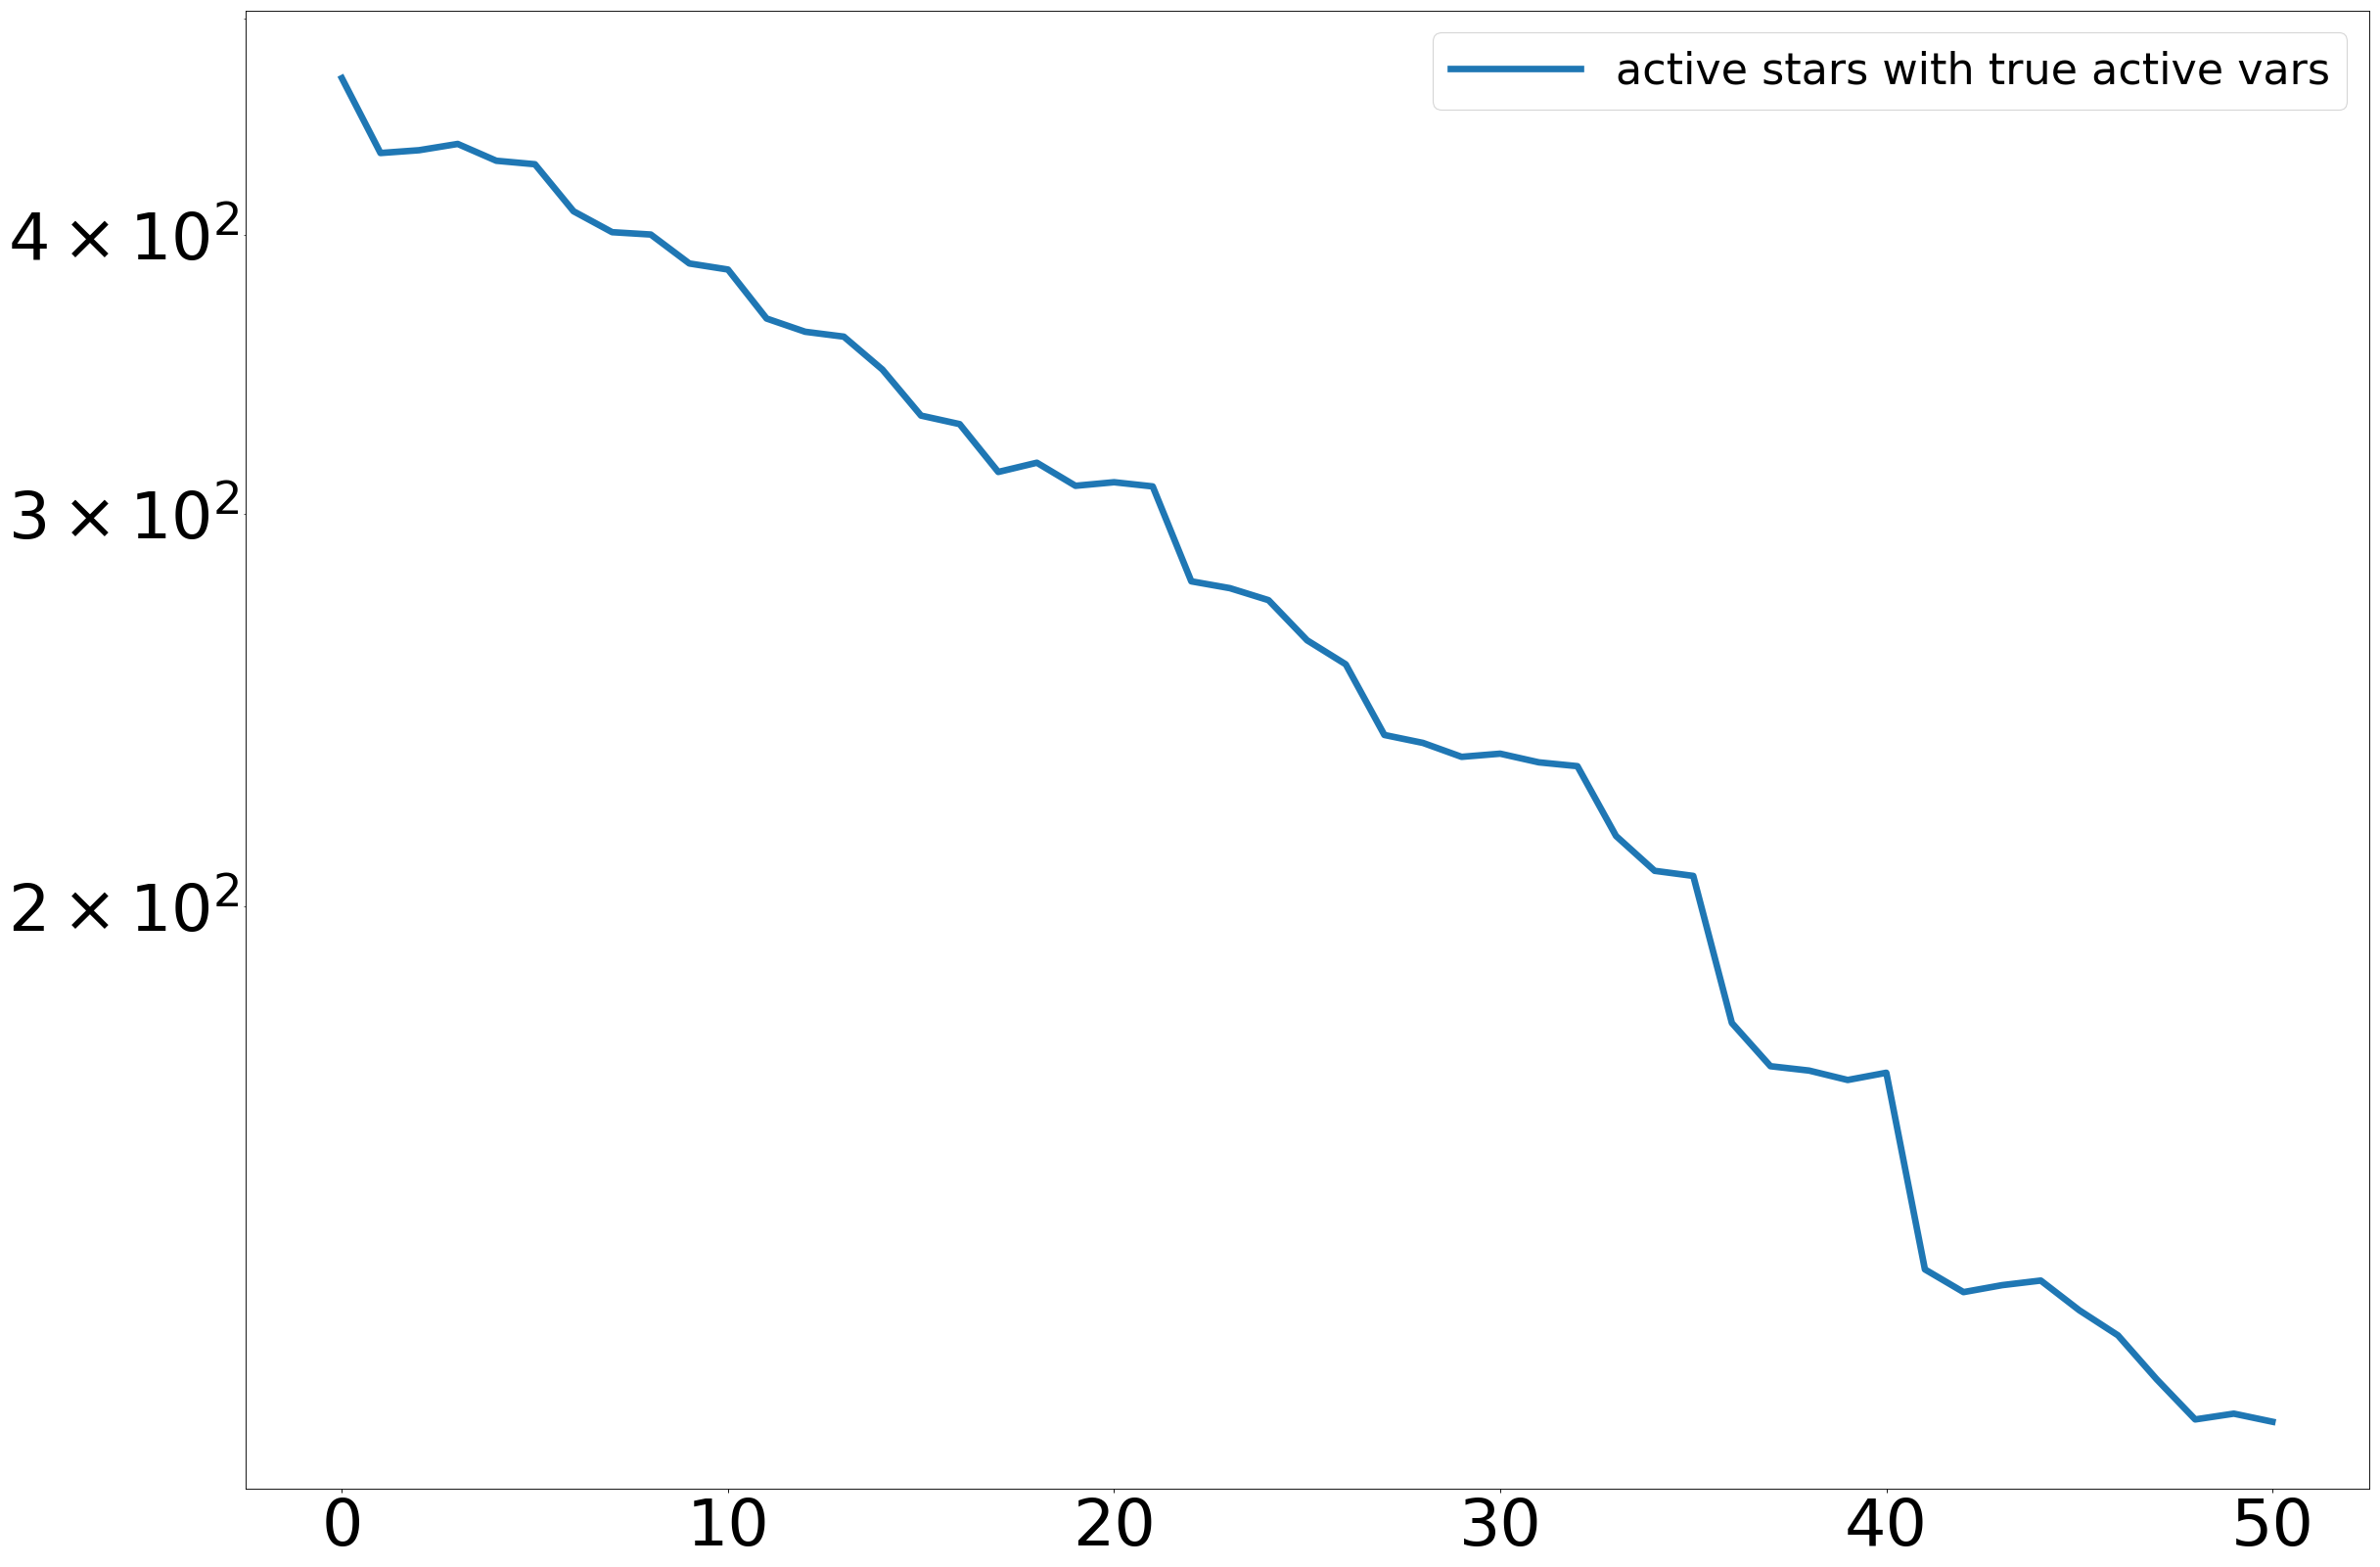

In [13]:
mu_star=dfo.get_mult_mu_star(mynoise,L_1_hat,6)
h=dfo.get_h(L_1_hat,6)

x3=np.copy(xinit)
xhist3=np.array(x3)
fhist3=np.array(tfun(x3))

active=np.eye(dim)
active=np.transpose(active[[0,2,4,6,8,10],:])
eigenvals=np.transpose([[2**10,2**8,2**6,2**4,2**2,1]])
our_wts=np.sqrt(eigenvals)


for i in range(50):
    [x3,f,temp1,temp2, p ,q,L1B]=dfo.STARS(x3,tfun,mu_star,h,active=active, wts=None,mult=True)
    xhist3=np.hstack((xhist3,x3))
    fhist3=np.vstack((fhist3,f))
    
plt.semilogy(fhist3,lw=6, label='active stars with true active vars')
plt.legend()
plt.show()

n should be an integer. Performing conversion.


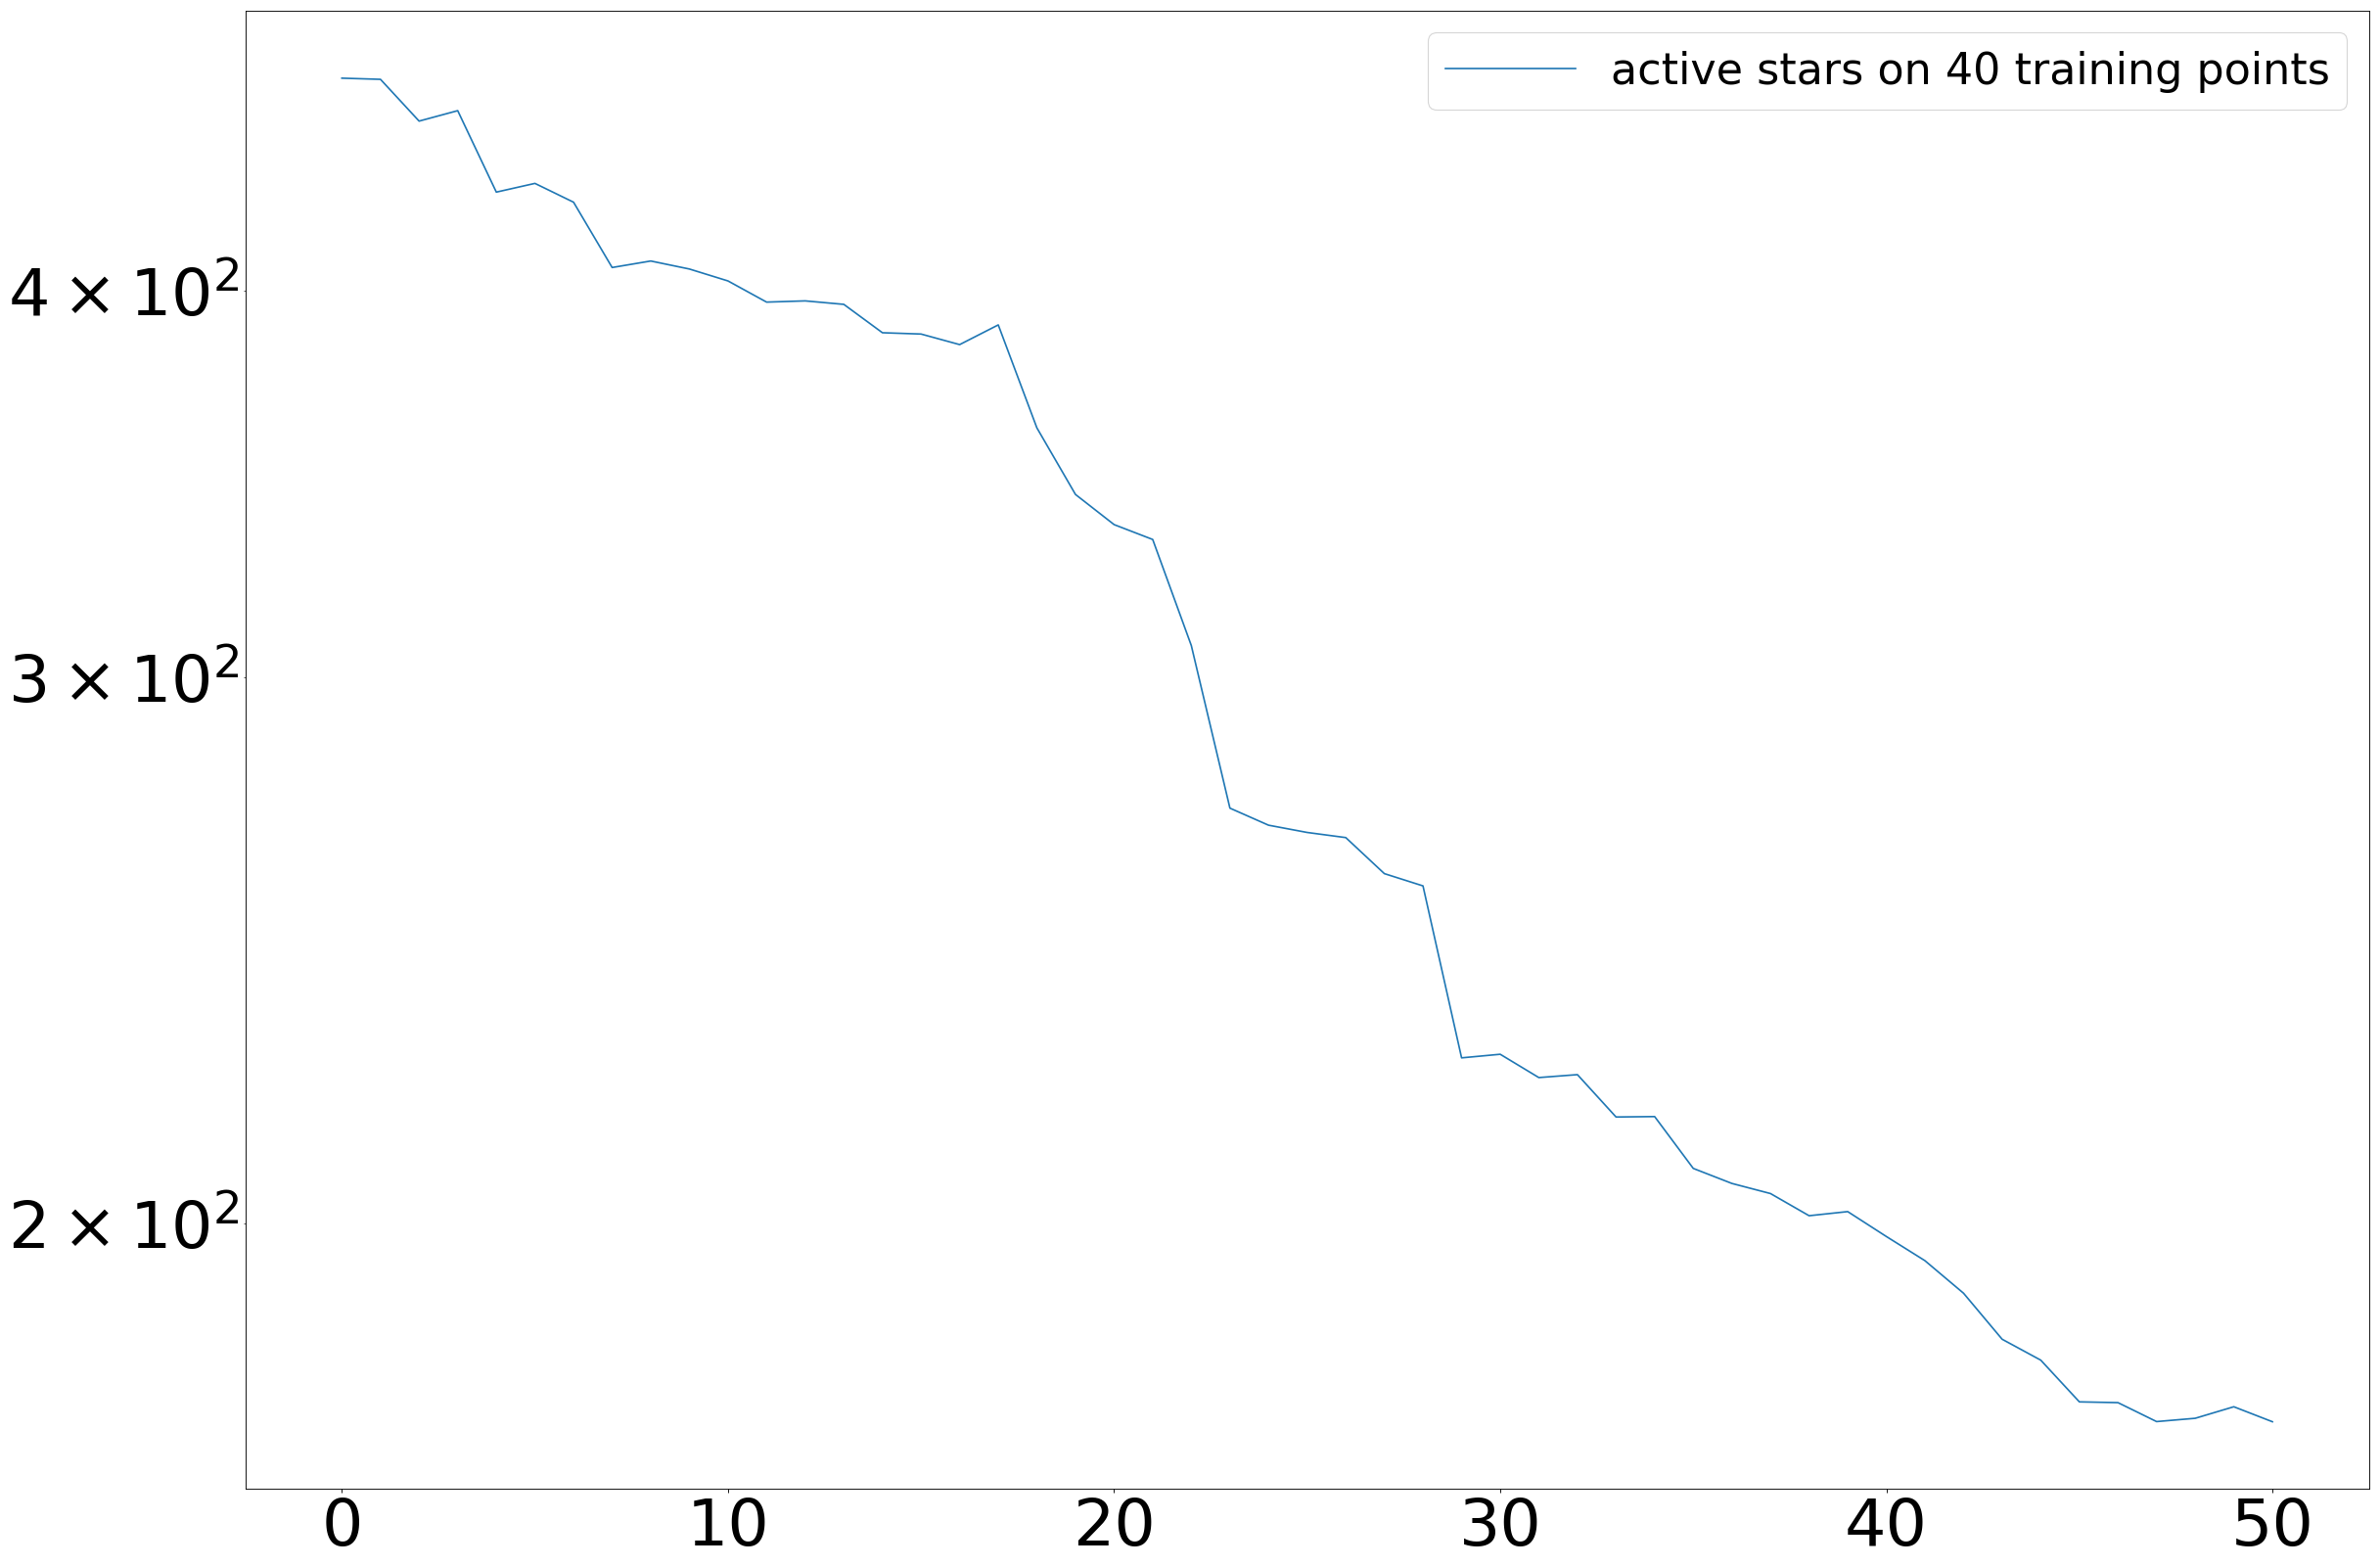

In [14]:
ss = ac.subspaces.Subspaces()
mu_star=dfo.get_mult_mu_star(mynoise,L_1_hat,6)
h=dfo.get_h(L_1_hat,6)

tr_stop=20

trainx=np.hstack((xhist[:,0:tr_stop],yhist[:,0:tr_stop]))
trainf=np.vstack((fhist[0:tr_stop],ghist[0:tr_stop]))
trainx=np.transpose(trainx)

# Use Local Linears
df = ac.gradients.local_linear_gradients(trainx, trainf) #Estimated gradients using local linear models
ss.compute(df=df, nboot=0)

# Use Global Quadratic
#ss.compute(X=trainx, f=trainf, nboot=0, sstype='QPHD')

sub=ss.eigenvecs

our_wts=np.sqrt(ss.eigenvals)
 
x4=np.transpose([xhist[:,tr_stop]])
xhist4=np.array(x4)
fhist5=np.vstack((fhist[0:tr_stop],tfun(x4)))


for i in range(0,50-tr_stop):
    [x4,f,temp,temp2,p,q,L1B]=dfo.STARS(x4,tfun,mu_star,h,active=sub,wts=None,mult=True)
    xhist4=np.hstack((xhist4,x4))
    fhist5=np.vstack((fhist5,f))


plt.semilogy(fhist5, label='active stars on 40 training points')
plt.legend()
plt.show()

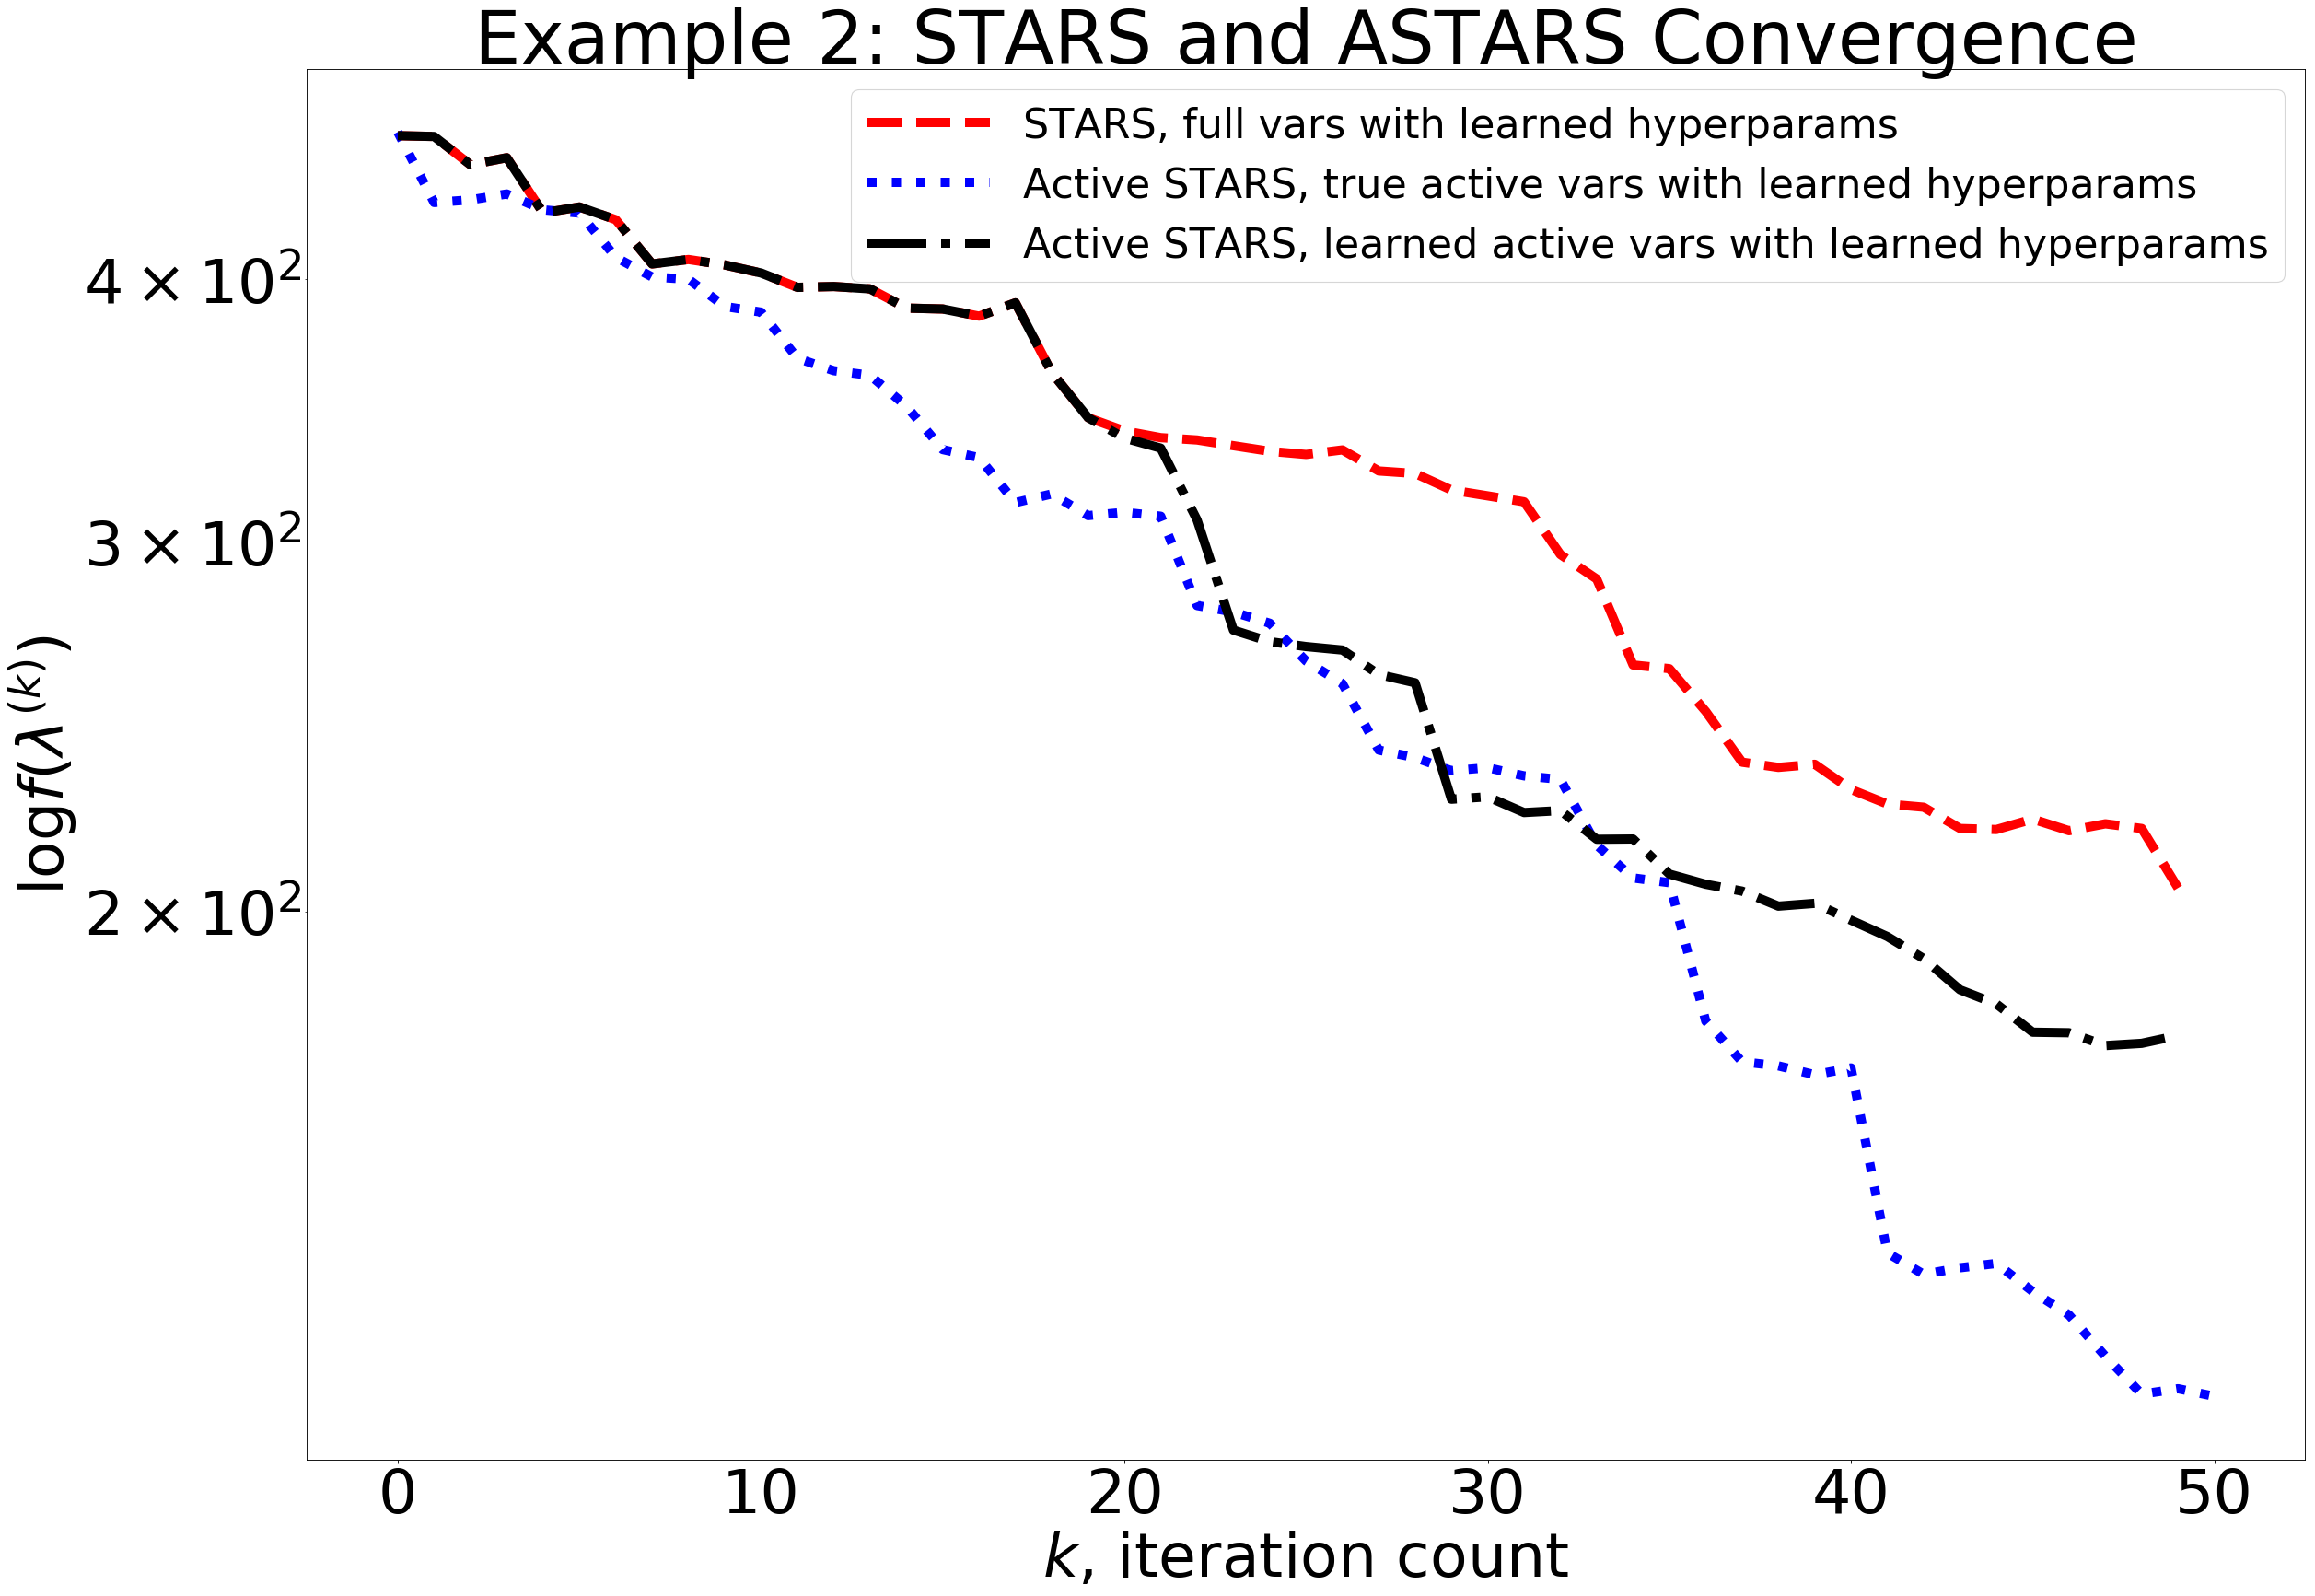

In [15]:
stars_full, sf_ls = 'red', '--'
active_stars_learned, lr_ls = 'black', '-.'
active_stars_ref, rf_ls = 'blue', ':'

plt.xlabel('$k$, iteration count')
plt.ylabel('$\log f(\lambda^{(k)})$')
plt.title('Example 2: STARS and ASTARS Convergence')

plt.semilogy(fhist[0:50], lw=9, ls=sf_ls, color=stars_full, label='STARS, full vars with learned hyperparams')
plt.semilogy(fhist3, lw=9, ls=rf_ls, color=active_stars_ref,  label='Active STARS, true active vars with learned hyperparams')
plt.semilogy(fhist5[0:50], lw=9, ls=lr_ls, color=active_stars_learned,label='Active STARS, learned active vars with learned hyperparams')

plt.legend()
plt.show()

In [16]:
print(fhist[50],fhist3[50],fhist5[50])

[208.46930725] [117.52081532] [172.62733386]


In [17]:
FHIST=np.copy(fhist)
FHIST3=np.copy(fhist3)
FHIST5=np.copy(fhist5)

sim_n=100

for j in range(sim_n):
    
    x=np.copy(xinit)
    maxit=50
    xhist=np.array(x)
    fhist=np.array(tfun(x))
    yhist=xhist
    ghist=fhist
    L1Bhist=np.array(L_1_hat)
    for i in range(maxit):
        [x,f,y,fy,p,q,L1B]=dfo.STARS(x,tfun,mu_star_OG,h_OG,mult=True)
        xhist=np.hstack((xhist,x))
        fhist=np.vstack((fhist,f))
        yhist=np.hstack((yhist,y))
        ghist=np.vstack((ghist,fy))
        L1Bhist=np.vstack((L1Bhist,L1B))



    mu_star=dfo.get_mu_star(mynoise,L_1_hat,6)
    h=dfo.get_h(L_1_hat,6)


    x3=np.copy(xinit)
    xhist3=np.array(x3)
    fhist3=np.array(tfun(x3))
    active=np.eye(dim)
    active=np.transpose(active[[0,2,4,6,8,10],:])
   
    for i in range(50):
        [x3,f,temp1,temp2, p ,q,L1B]=dfo.STARS(x3,tfun,mu_star,h,active=active,mult=True)
        xhist3=np.hstack((xhist3,x3))
        fhist3=np.vstack((fhist3,f))



    ss = ac.subspaces.Subspaces()
    mu_star=dfo.get_mu_star(mynoise,L_1_hat,3)
    h=dfo.get_h(L_1_hat,3)

    tr_stop=20

    trainx=np.hstack((xhist[:,0:tr_stop],yhist[:,0:tr_stop]))
    trainf=np.vstack((fhist[0:tr_stop],ghist[0:tr_stop]))
    trainx=np.transpose(trainx)


    
    # Use Local Linears
    df = ac.gradients.local_linear_gradients(trainx, trainf) #Estimated gradients using local linear models
    ss.compute(df=df, nboot=0)
    
    # Use Global Quadratic
    #ss.compute(X=trainx, f=trainf, nboot=0, sstype='QPHD')

    sub=ss.eigenvecs[:,0:6]

    x4=np.transpose([xhist[:,tr_stop-1]])
    xhist4=np.array(x4)
    fhist5=np.vstack((fhist[0:tr_stop],tfun(x4)))


    for i in range(0,50-tr_stop):
        [x4,f,temp,temp2,p,q,L1B]=dfo.STARS(x4,tfun,mu_star,h,active=sub,mult=True)
        xhist4=np.hstack((xhist4,x4))
        fhist5=np.vstack((fhist5,f))

    FHIST=np.hstack((FHIST,fhist))
    FHIST3=np.hstack((FHIST3,fhist3))
    FHIST5=np.hstack((FHIST5,fhist5))
   
print(FHIST.shape,FHIST3.shape,FHIST5.shape)

n should be an integer. Performing conversion.
n should be an integer. Performing conversion.
n should be an integer. Performing conversion.
n should be an integer. Performing conversion.
n should be an integer. Performing conversion.
n should be an integer. Performing conversion.
n should be an integer. Performing conversion.
n should be an integer. Performing conversion.
n should be an integer. Performing conversion.
n should be an integer. Performing conversion.
n should be an integer. Performing conversion.
n should be an integer. Performing conversion.
n should be an integer. Performing conversion.
n should be an integer. Performing conversion.
n should be an integer. Performing conversion.
n should be an integer. Performing conversion.
n should be an integer. Performing conversion.
n should be an integer. Performing conversion.
n should be an integer. Performing conversion.
n should be an integer. Performing conversion.
n should be an integer. Performing conversion.
n should be a

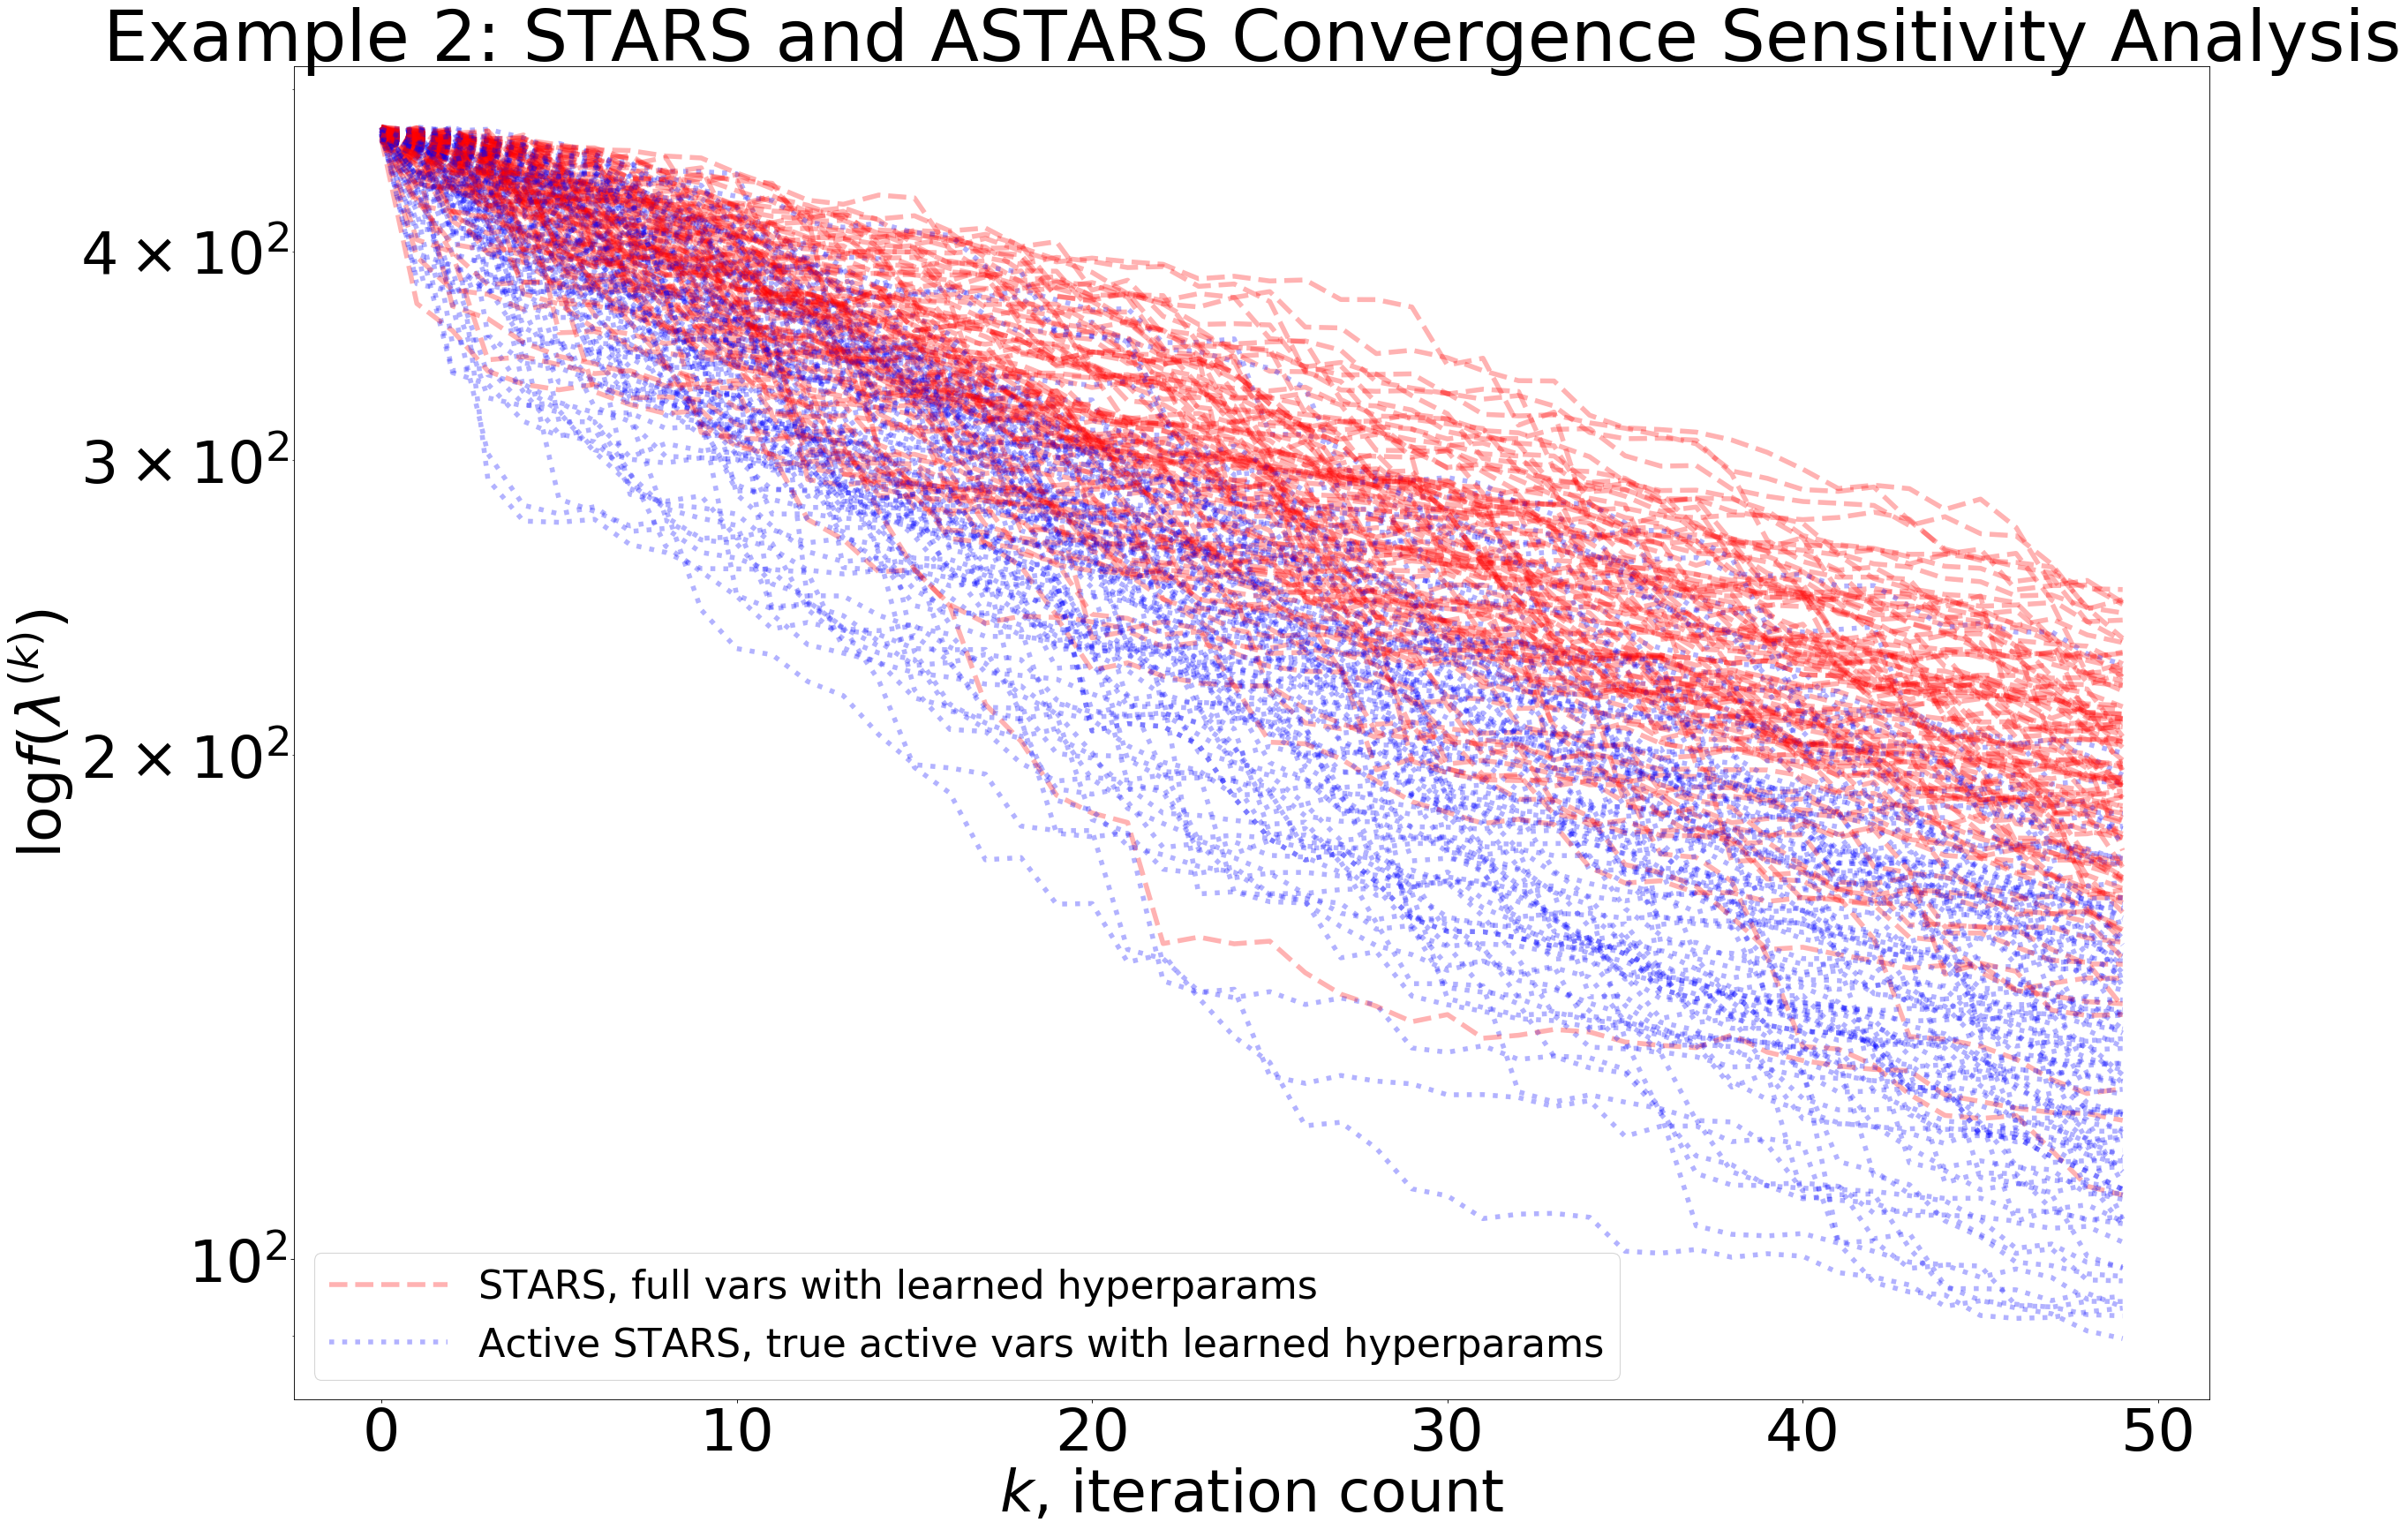

In [18]:
stars_full, sf_ls = 'red', '--'
active_stars_learned, lr_ls = 'black', '-.'
active_stars_ref, rf_ls = 'blue', ':'

alpha=0.3

for j in range(sim_n):
    plt.semilogy(FHIST[0:50,j], lw=5, alpha=alpha,color=stars_full, ls=sf_ls)
    plt.semilogy(FHIST3[0:50,j], lw=5, alpha=alpha,color=active_stars_ref ,ls=rf_ls)
    #plt.semilogy(FHIST5[0:50,j], lw=5, alpha=alpha,color=active_stars_learned, ls=lr_ls)
plt.semilogy(FHIST[0:50,j], lw=5, alpha=alpha,color=stars_full,ls=sf_ls, label='STARS, full vars with learned hyperparams')
plt.semilogy(FHIST3[0:50,j], lw=5, alpha=alpha,color=active_stars_ref ,ls=rf_ls,  label='Active STARS, true active vars with learned hyperparams')
#plt.semilogy(FHIST5[0:50,j], lw=5, alpha=alpha,color=active_stars_learned, ls=lr_ls, label='Active STARS, learned active vars with learned hyperparams')

plt.xlabel('$k$, iteration count')
plt.ylabel('$\log f(\lambda^{(k)})$')
plt.title('Example 2: STARS and ASTARS Convergence Sensitivity Analysis')

params = {'legend.fontsize': 40,
          'legend.handlelength': 3}
plt.rcParams["figure.figsize"] = (35,20)
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['font.size'] = 60
plt.rcParams['figure.titlesize'] = 'xx-large'
plt.rcParams.update(params)
plt.legend()
plt.show()

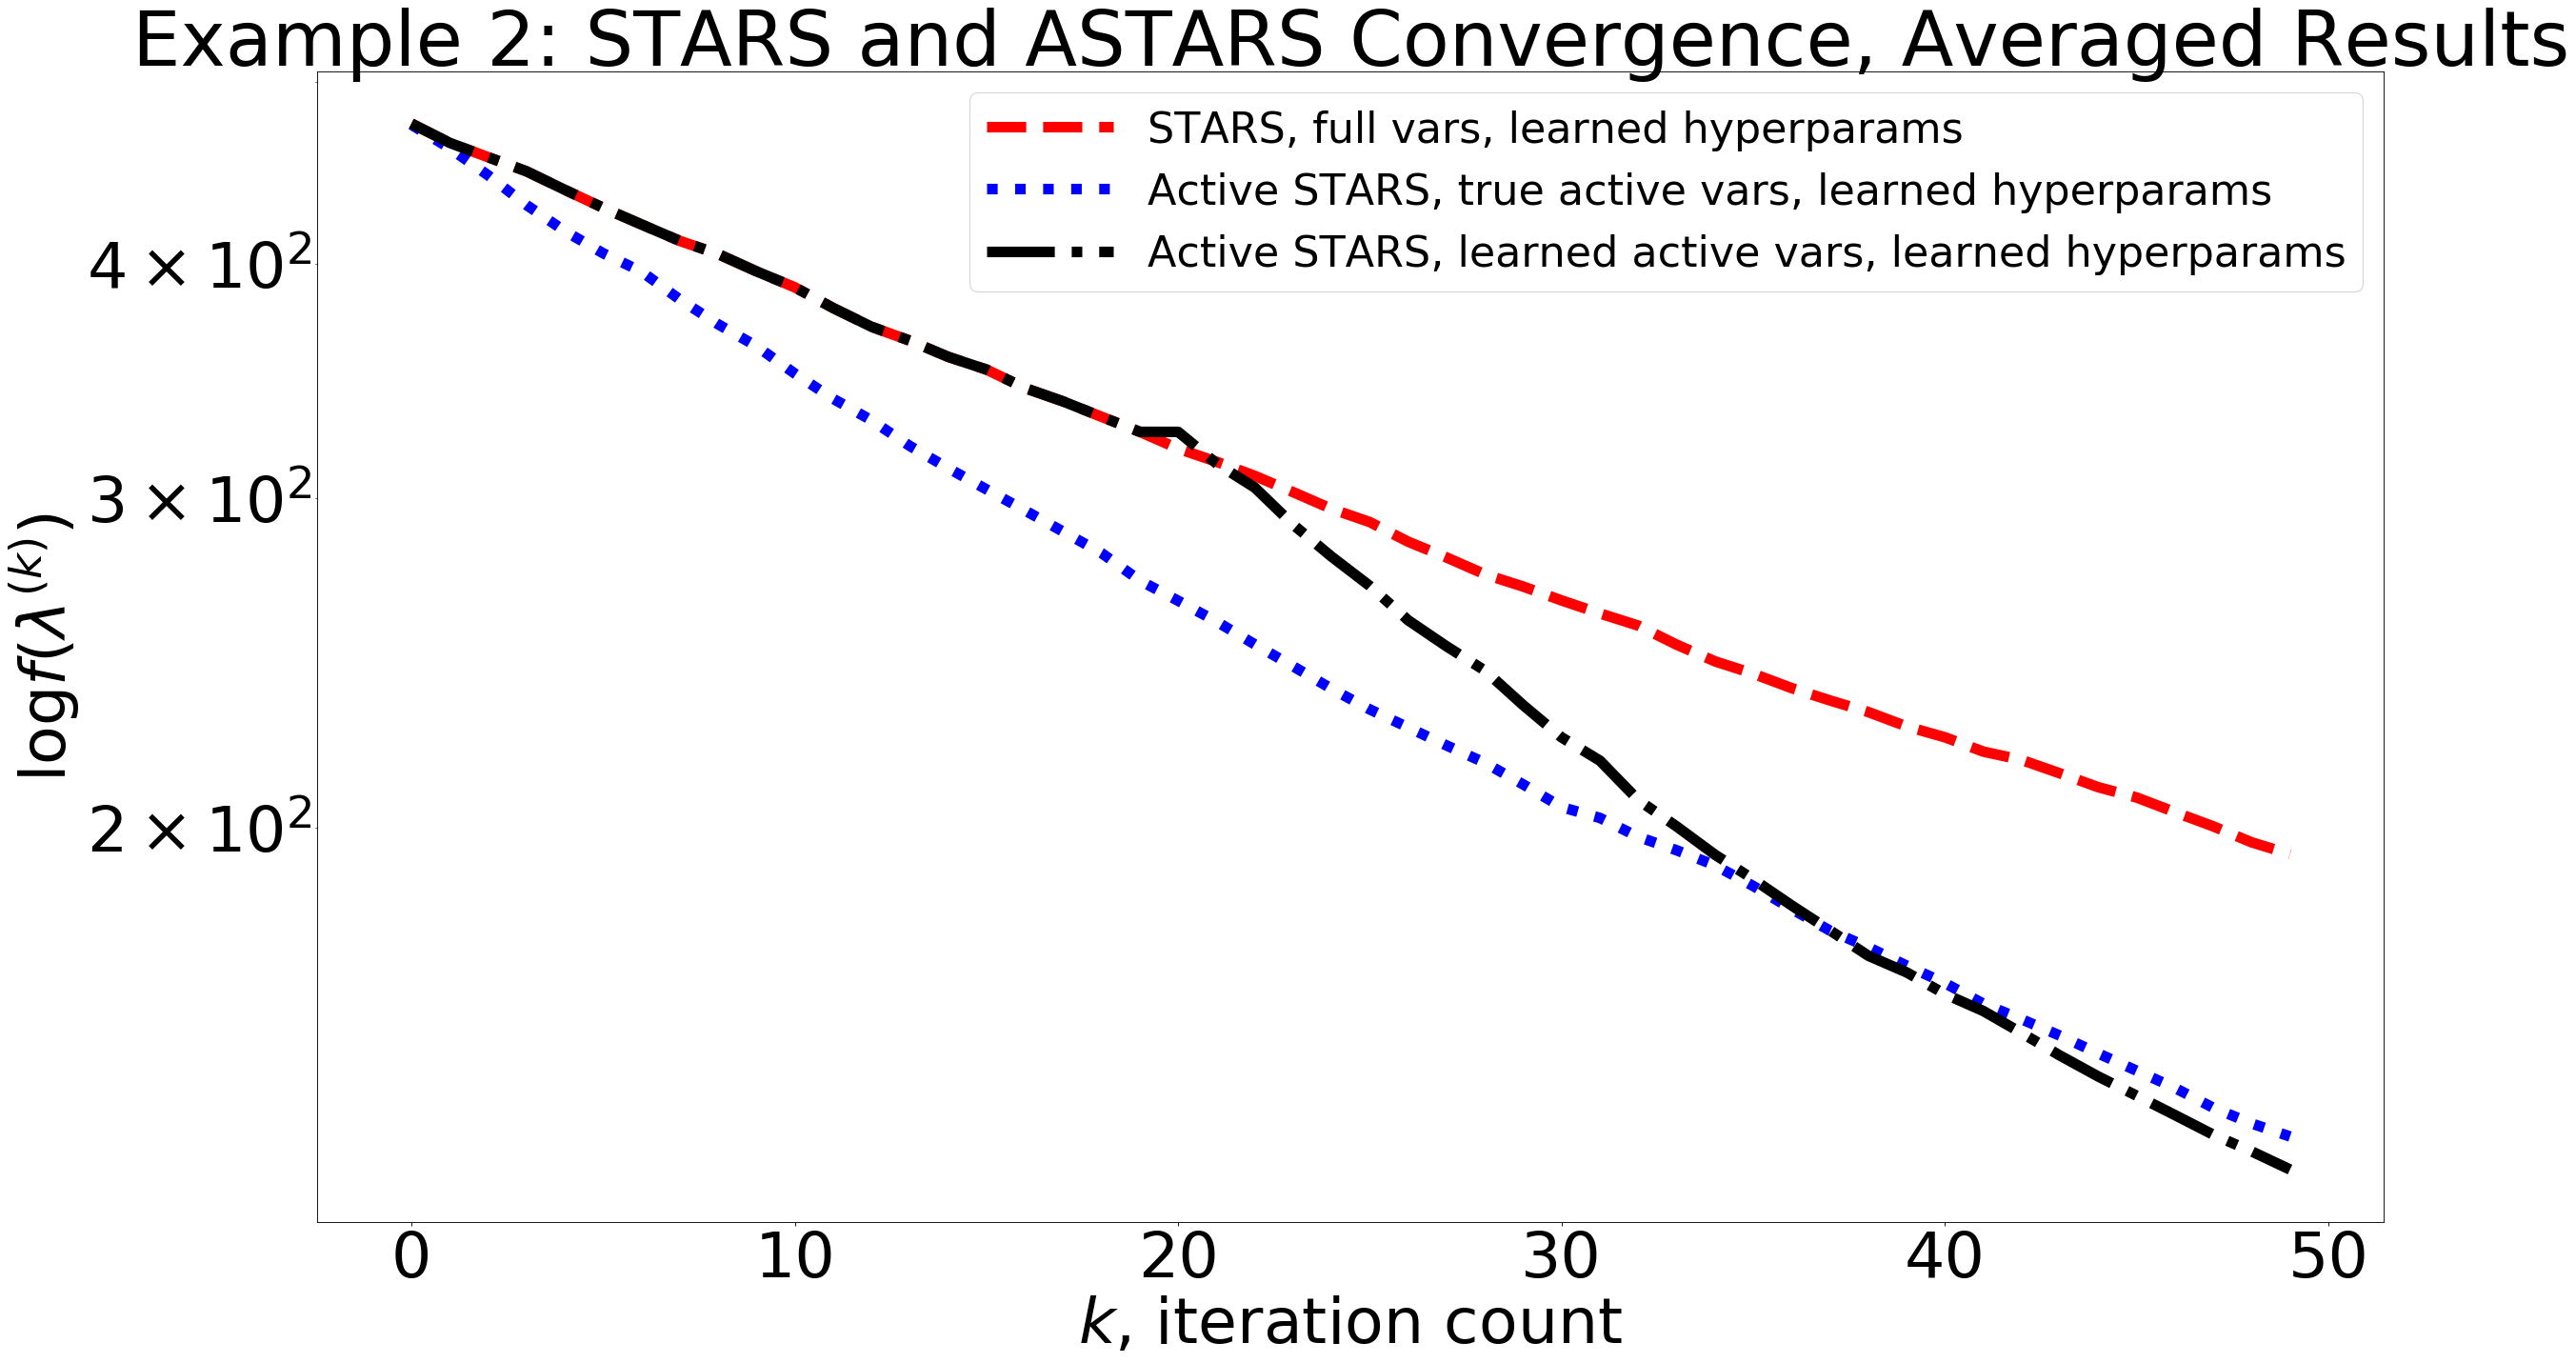

In [19]:
FHISTA=np.zeros((50,1))
FHISTA3=np.zeros((50,1))
FHISTA5=np.zeros((50,1))

for j in range(50):
    FHISTA[j]=np.sum(FHIST[j,:],axis=0)/sim_n
    FHISTA3[j]=np.sum(FHIST3[j,:],axis=0)/sim_n
    FHISTA5[j]=np.sum(FHIST5[j,:],axis=0)/sim_n
    


plt.semilogy(FHISTA, lw=10, alpha=1,color=stars_full,ls=sf_ls, label='STARS, full vars, learned hyperparams')
plt.semilogy(FHISTA3, lw=10, alpha=1,color=active_stars_ref ,ls=rf_ls,  label='Active STARS, true active vars, learned hyperparams')
plt.semilogy(FHISTA5, lw=10, alpha=1,color=active_stars_learned, ls=lr_ls, label='Active STARS, learned active vars, learned hyperparams')

plt.xlabel('$k$, iteration count')
plt.ylabel('$\log f(\lambda^{(k)})$')
plt.title('Example 2: STARS and ASTARS Convergence, Averaged Results')

params = {'legend.fontsize': 40,
          'legend.handlelength': 3}
plt.rcParams["figure.figsize"] = (35,20)
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['font.size'] = 60
plt.rcParams['figure.titlesize'] = 'xx-large'
plt.rcParams.update(params)
plt.legend()
plt.show()